In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
#Separate Dataset into training and testing sets 75:25
from sklearn.cluster import KMeans

In [6]:
data=pd.read_csv("customers.csv")

In [7]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
# Question 2
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

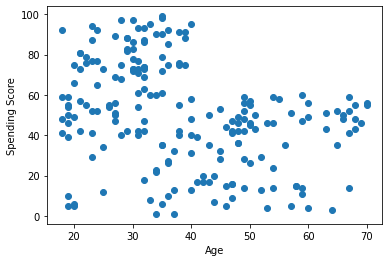

In [12]:
#Question 3
plt.scatter(x=data['Age'], y=data['Spending Score (1-100)'])
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.show()

In [14]:
#Question 4
f1=data['Age'].values
f2=data['Spending Score (1-100)'].values
x=np.array(list(zip(f1,f2)))

In [16]:
inertia=[]

In [17]:
for n in range(1,11):
    alg=KMeans(n_clusters=n)
    alg.fit(x)
    inertia.append(alg.inertia_)#alg.inertia_ this will find the sum of square distance of samples of thier closest clusters center
    

In [18]:
inertia

[171535.50000000003,
 75949.15601023012,
 45840.67661610871,
 28165.583566629342,
 23818.848251581334,
 19492.611301496087,
 15514.193134351033,
 13054.172145982677,
 11459.506094710448,
 10190.72107921802]

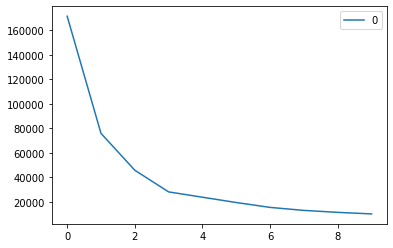

In [20]:
pd.DataFrame(inertia).plot()
plt.show()

In [21]:
alg = KMeans(n_clusters=3)
alg.fit(x)
labels=alg.labels_ #inertia_ -> tells us about the label of each point

In [22]:
labels

array([0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1,
       2, 1, 2, 1, 0, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 0,
       2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [26]:
cluster=data[['Age','Spending Score (1-100)']]

In [28]:
cluster=cluster.assign(cluster=labels)

In [29]:
cluster

,Age,Spending Score (1-100),cluster
0,19,39,0
1,21,81,1
2,20,6,2
3,23,77,1
4,31,40,0
...,...,...,...
195,35,79,1
196,45,28,2
197,32,74,1
198,32,18,2


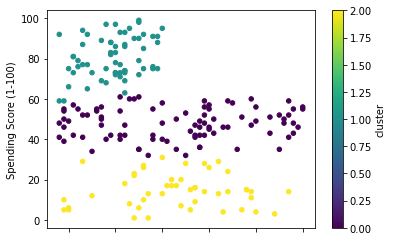

In [32]:
#Question 5
cluster.plot.scatter(x='Age',y='Spending Score (1-100)',c='cluster',colormap='viridis')
plt.show()